#                          AtliQ Hotels data Analysis Project 

In [ ]:
import pandas as pd

In [10]:
import pandas as pd
df_bookings = pd.read_csv("fact_bookings.csv")
df_bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640


In [11]:
df_bookings.shape

(134590, 12)

In [12]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [14]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [16]:
df_bookings.booking_platform.value_counts()

others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: booking_platform, dtype: int64

<Axes: >

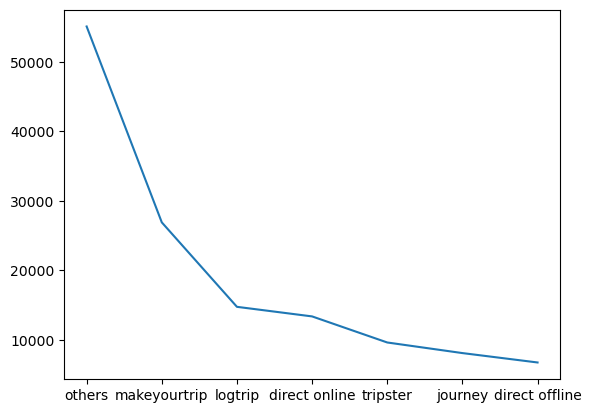

In [18]:
df_bookings.booking_platform.value_counts().plot()

<Axes: >

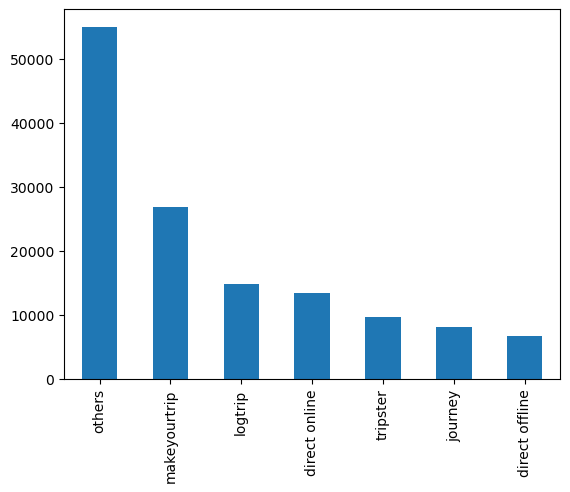

In [20]:
df_bookings.booking_platform.value_counts().plot(kind="bar")

<Axes: >

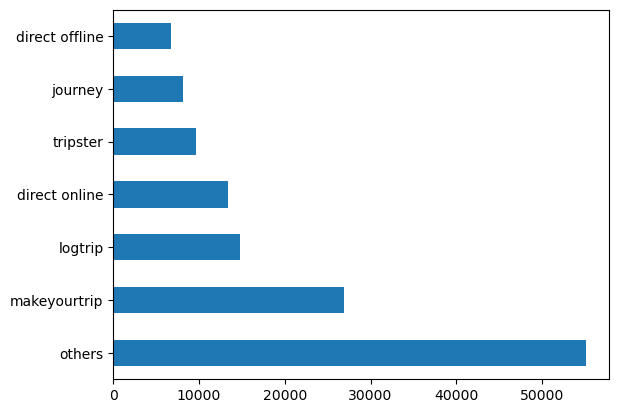

In [21]:
df_bookings.booking_platform.value_counts().plot(kind="barh")

In [22]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [25]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(6500, 28560000)

In [36]:
df_date=pd.read_csv("dim_date.csv")
df_date
df_hotels=pd.read_csv("dim_hotels.csv")
df_hotels
df_rooms=pd.read_csv("dim_rooms.csv")
df_rooms
df_agg_bookings=pd.read_csv("fact_aggregated_bookings.csv")
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [30]:
df_date.shape

(92, 4)

In [37]:
df_agg_bookings.shape

(9200, 5)

In [38]:
df_hotels.head(4)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi


In [40]:
df_hotels.category.value_counts()

Luxury      16
Business     9
Name: category, dtype: int64

<Axes: >

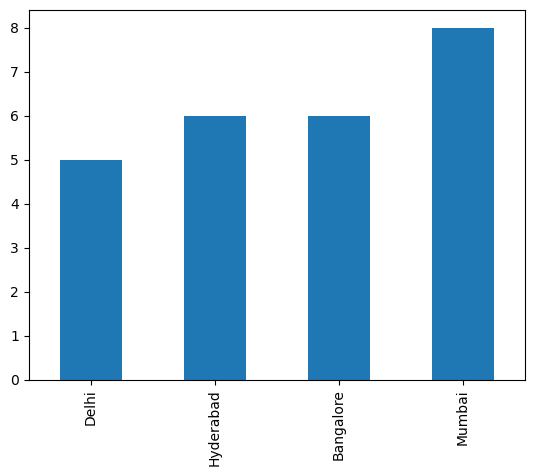

In [46]:
df_hotels.city.value_counts().sort_values().plot(kind="bar")

In [47]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

In [51]:
#df_agg_bookings.property_id.value_counts()
df_agg_bookings.groupby("property_id")["successful_bookings"].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [53]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [54]:
df_agg_bookings.capacity.max()

50.0

In [55]:
df_agg_bookings[df_agg_bookings.capacity==df_agg_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


In [59]:
df_bookings.describe()


,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


# Data Cleaning

In [65]:
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [67]:
df_bookings.shape

(134590, 12)

In [68]:
df_bookings=df_bookings[df_bookings.no_guests>=0]
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [69]:
df_bookings.shape

(134578, 12)

In [106]:
df_bookings.describe()

count     134578
unique         2
top        False
freq      134573
Name: revenue_generated, dtype: object

In [107]:
df_bookings.shape

(134578,)

In [108]:
df_bookings.shape

(134578,)

In [109]:
import pandas as pd
df_bookings = pd.read_csv("fact_bookings.csv")
df_bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640


In [110]:
df_bookings.shape

(134590, 12)

In [111]:
df_bookings=df_bookings[df_bookings.no_guests>=0]
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [112]:
df_bookings.shape

(134578, 12)

In [113]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500, 28560000)

In [114]:
df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.median()

(15378.036937686695, 13500.0)

In [ ]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()

In [115]:

higher_limit = avg + 3*std
higher_limit

294498.50173198653

In [116]:
df_bookings[df_bookings.revenue_generated<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [117]:
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [118]:
df_bookings = df_bookings[df_bookings.revenue_generated<=higher_limit]

In [119]:
df_bookings.shape

(134573, 12)

In [122]:
df_bookings = df_bookings[df_bookings.revenue_generated<higher_limit]
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [123]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [127]:
higher_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
higher_limit

33479.3586618449

In [128]:
df_bookings[df_bookings.revenue_realized>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [129]:
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [130]:
# mean + 3*standard deviation
23439+3*9048

50583

In [131]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [132]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [133]:
df_agg_bookings[df_agg_bookings.capacity.isna()]


,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [134]:
df_agg_bookings.capacity.median()

25.0

In [135]:
df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace=True)

In [136]:
df_agg_bookings.loc[[8,14]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
14,17562,1-May-22,RT1,12,25.0


In [137]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [138]:
df_agg_bookings.shape

(9200, 5)

In [139]:
df_agg_bookings = df_agg_bookings[df_agg_bookings.successful_bookings<=df_agg_bookings.capacity]
df_agg_bookings.shape

(9194, 5)

In [3]:
import pandas as pd
df_agg_bookings = pd.read_csv("fact_aggregated_bookings.csv")
df_agg_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0


# Data Transformation

Create occupancy percentage column

In [4]:
df_agg_bookings["occ_pct"]=df_agg_bookings["successful_bookings"]/df_agg_bookings["capacity"]
df_agg_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
3,17558,1-May-22,RT1,30,19.0,1.578947


# Insights Generation

# 1. What is the average occupany rate in each of the room categories?

In [45]:
df_agg_bookings["occ_pct"]=df_agg_bookings["successful_bookings"]/df_agg_bookings["capacity"]
df_agg_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
3,17558,1-May-22,RT1,30,19.0,1.578947


In [46]:
df_agg_bookings["occ_pct"]=df_agg_bookings["occ_pct"].apply(lambda x:x*100,2)
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.333333
1,19562,1-May-22,RT1,28,30.0,93.333333
2,19563,1-May-22,RT1,23,30.0,76.666667
3,17558,1-May-22,RT1,30,19.0,157.894737
4,16558,1-May-22,RT1,18,19.0,94.736842
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.222222
9196,16559,31-Jul-22,RT4,13,18.0,72.222222
9197,17558,31-Jul-22,RT4,3,6.0,50.000000
9198,19563,31-Jul-22,RT4,3,6.0,50.000000


In [49]:
df_agg_bookings.groupby("room_category")["occ_pct"].mean().round(2)

room_category
RT1    58.22
RT2    58.04
RT3    58.03
RT4    59.30
Name: occ_pct, dtype: float64

In [51]:
import pandas as pd
df_rooms = pd.read_csv("dim_rooms.csv")
df_rooms.head(4)

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [54]:
df=pd.merge(df_agg_bookings,df_rooms, left_on="room_category", right_on="room_id" )
df.tail(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
9196,16559,31-Jul-22,RT4,13,18.0,72.222222,RT4,Presidential
9197,17558,31-Jul-22,RT4,3,6.0,50.000000,RT4,Presidential
9198,19563,31-Jul-22,RT4,3,6.0,50.000000,RT4,Presidential
9199,17561,31-Jul-22,RT4,3,4.0,75.000000,RT4,Presidential


In [57]:
df.groupby("room_class")["occ_pct"].mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.22
Name: occ_pct, dtype: float64

In [58]:
df.drop("room_id",axis=1,inplace=True)
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.333333,Standard
1,19562,1-May-22,RT1,28,30.0,93.333333,Standard
2,19563,1-May-22,RT1,23,30.0,76.666667,Standard
3,17558,1-May-22,RT1,30,19.0,157.894737,Standard
4,16558,1-May-22,RT1,18,19.0,94.736842,Standard


# 2. Print average occupancy rate per city

In [60]:
import pandas as pd
df_hotels = pd.read_csv("dim_hotels.csv")
df_hotels

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi
6,17558,Atliq Grands,Luxury,Mumbai
7,17559,Atliq Exotica,Luxury,Mumbai
8,17560,Atliq City,Business,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai


In [73]:
df=pd.merge(df,df_hotels, on= "property_id")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name_x,category_x,city_x,...,city_y,property_name_x,category_x,city_x,property_name_y,category_y,city_y,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.333333,Standard,Atliq Exotica,Luxury,Mumbai,...,Mumbai,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,66.666667,Standard,Atliq Exotica,Luxury,Mumbai,...,Mumbai,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,56.666667,Standard,Atliq Exotica,Luxury,Mumbai,...,Mumbai,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai


In [69]:
df.groupby("city")["occ_pct"].mean().round(2)

city
Bangalore    56.59
Delhi        61.61
Hyderabad    58.14
Mumbai       57.94
Name: occ_pct, dtype: float64

<Axes: xlabel='city'>

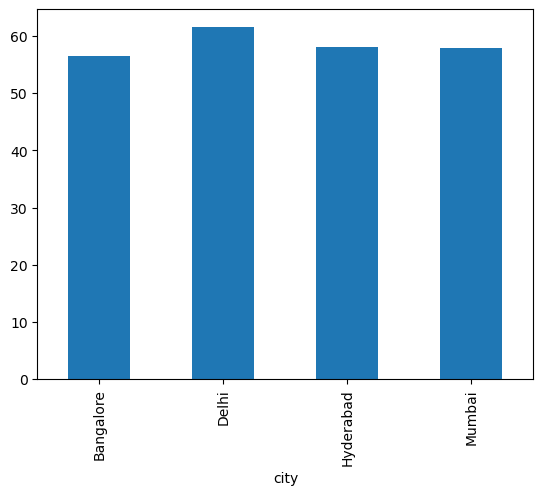

In [74]:
df.groupby("city")["occ_pct"].mean().round(2).plot(kind="bar")

# 3. When was occupancy better?Weekday OR Weekend?

In [76]:
import pandas as pd
df_dates = pd.read_csv("dim_date.csv")
df_dates

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [78]:
df=pd.merge(df,df_dates,left_on= "check_in_date",right_on="date")
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name_x,category_x,city_x,...,property_name_y,category_y,city_y,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,60.000000,Standard,Atliq Exotica,Luxury,Mumbai,...,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,60.975610,Elite,Atliq Exotica,Luxury,Mumbai,...,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.500000,Premium,Atliq Exotica,Luxury,Mumbai,...,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
3,16559,10-May-22,RT4,13,18.0,72.222222,Presidential,Atliq Exotica,Luxury,Mumbai,...,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
4,19562,10-May-22,RT1,18,30.0,60.000000,Standard,Atliq Bay,Luxury,Bangalore,...,Atliq Bay,Luxury,Bangalore,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday


In [80]:
df.groupby("day_type")["occ_pct"].mean().round(2)

day_type
weekeday    50.90
weekend     72.39
Name: occ_pct, dtype: float64

<Axes: xlabel='day_type'>

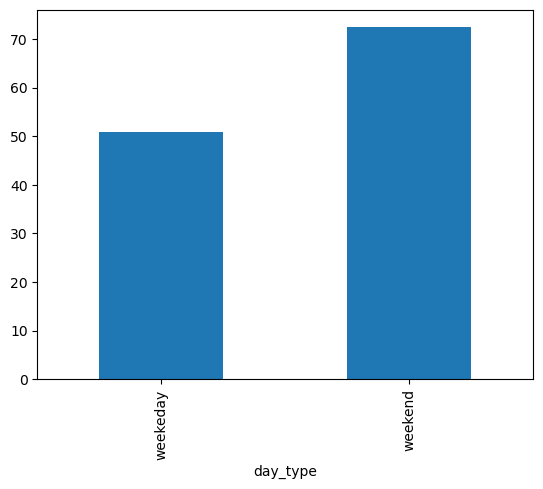

In [81]:
df.groupby("day_type")["occ_pct"].mean().round(2).plot(kind="bar")


# 4. In the month of june what is the occupancy of different states?

In [83]:
df["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [87]:
df_jun_22=df[df["mmm yy"]=="Jun 22"]
df_jun_22

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name_x,category_x,city_x,...,property_name_y,category_y,city_y,property_name,category,city,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.666667,Standard,Atliq Exotica,Luxury,Mumbai,...,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,16559,10-Jun-22,RT2,26,41.0,63.414634,Elite,Atliq Exotica,Luxury,Mumbai,...,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2202,16559,10-Jun-22,RT3,20,32.0,62.500000,Premium,Atliq Exotica,Luxury,Mumbai,...,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2203,16559,10-Jun-22,RT4,11,18.0,61.111111,Presidential,Atliq Exotica,Luxury,Mumbai,...,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2204,19562,10-Jun-22,RT1,19,30.0,63.333333,Standard,Atliq Bay,Luxury,Bangalore,...,Atliq Bay,Luxury,Bangalore,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,17564,30-Jun-22,RT4,7,17.0,41.176471,Presidential,Atliq Seasons,Business,Mumbai,...,Atliq Seasons,Business,Mumbai,Atliq Seasons,Business,Mumbai,30-Jun-22,Jun 22,W 27,weekeday
4296,18560,30-Jun-22,RT1,18,30.0,60.000000,Standard,Atliq City,Business,Hyderabad,...,Atliq City,Business,Hyderabad,Atliq City,Business,Hyderabad,30-Jun-22,Jun 22,W 27,weekeday
4297,18560,30-Jun-22,RT2,24,40.0,60.000000,Elite,Atliq City,Business,Hyderabad,...,Atliq City,Business,Hyderabad,Atliq City,Business,Hyderabad,30-Jun-22,Jun 22,W 27,weekeday
4298,18560,30-Jun-22,RT3,14,24.0,58.333333,Premium,Atliq City,Business,Hyderabad,...,Atliq City,Business,Hyderabad,Atliq City,Business,Hyderabad,30-Jun-22,Jun 22,W 27,weekeday


In [90]:
df_jun_22.groupby("city")["occ_pct"].mean().round(2)

city
Bangalore    56.58
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Name: occ_pct, dtype: float64

In [94]:
df_jun_22.groupby("city")["occ_pct"].mean().round(2).sort_values

<bound method Series.sort_values of city
Bangalore    56.58
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Name: occ_pct, dtype: float64>

In [95]:
df_jun_22.groupby("city")["occ_pct"].mean().round(2).sort_values(ascending=False)

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.58
Name: occ_pct, dtype: float64

In [103]:
import pandas as pd
df_august = pd.read_csv("new_data_august.csv")
df_august.head(4)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00


In [105]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct', 'room_class', 'property_name_x', 'category_x',
       'city_x', 'property_name_y', 'category_y', 'city_y', 'property_name_x',
       'category_x', 'city_x', 'property_name_y', 'category_y', 'city_y',
       'property_name_x', 'category_x', 'city_x', 'property_name_y',
       'category_y', 'city_y', 'property_name', 'category', 'city', 'date',
       'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [106]:
df.shape

(6500, 32)

In [ ]:
#latest_df = pd.concat([df, df_august], ignore_index = True, axis = 0)
#latest_df.tail(10)

In [111]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [112]:
df = df.reset_index(drop=True)

In [116]:
df. columns.unique()

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct', 'room_class', 'property_name_x', 'category_x',
       'city_x', 'property_name_y', 'category_y', 'city_y', 'property_name',
       'category', 'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [118]:
df2 = df.loc[:,~df.columns.duplicated()]# Remove the duplicated columns and stored in df2

In [122]:
df2. columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct', 'room_class', 'property_name_x', 'category_x',
       'city_x', 'property_name_y', 'category_y', 'city_y', 'property_name',
       'category', 'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [123]:
latest_df = pd.concat([df2, df_august], ignore_index = True, axis = 0)
latest_df.tail(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name_x,category_x,city_x,...,category_y,city_y,property_name,category,city,date,mmm yy,week no,day_type,occ%
6497,18560,31-Jul-22,RT2,34,40.0,85.000000,Elite,Atliq City,Business,Hyderabad,...,Business,Hyderabad,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend,NaN
6498,18560,31-Jul-22,RT3,17,24.0,70.833333,Premium,Atliq City,Business,Hyderabad,...,Business,Hyderabad,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend,NaN
6499,18560,31-Jul-22,RT4,12,15.0,80.000000,Presidential,Atliq City,Business,Hyderabad,...,Business,Hyderabad,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend,NaN
6500,16559,01-Aug-22,RT1,30,30.0,NaN,Standard,NaN,NaN,NaN,...,NaN,NaN,Atliq Exotica,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,100.00
6501,19562,01-Aug-22,RT1,21,30.0,NaN,Standard,NaN,NaN,NaN,...,NaN,NaN,Atliq Bay,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,70.00
6502,19563,01-Aug-22,RT1,23,30.0,NaN,Standard,NaN,NaN,NaN,...,NaN,NaN,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.67
6503,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,NaN,NaN,NaN,...,NaN,NaN,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.00
6504,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,NaN,NaN,NaN,...,NaN,NaN,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.92
6505,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,NaN,NaN,NaN,...,NaN,NaN,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
6506,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,NaN,NaN,NaN,...,NaN,NaN,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


In [125]:
latest_df.shape

(6507, 21)

# 5. Print revenue realized per city

In [128]:
df_bookings = pd.read_csv("fact_bookings.csv")
df_bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640


In [129]:
df=pd.merge(df_bookings,df_hotels, on= "property_id")
df.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100,Atliq Grands,Luxury,Delhi


In [131]:
df.groupby("city")["revenue_realized"].sum().round(2)

city
Bangalore    420397050
Delhi        294500318
Hyderabad    325232870
Mumbai       668640991
Name: revenue_realized, dtype: int64

# 6. Print Month by Month revenue

In [135]:
df=pd.merge(df_bookings,df_dates, left_on= "check_in_date",right_on="date")
df.tail(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,date,mmm yy,week no,day_type


In [137]:
df_bookings = pd.read_csv("fact_bookings.csv")
df_bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640


In [140]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134587 non-null  float64
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 12.3+ MB


In [141]:
import pandas as pd
df_dates = pd.read_csv("dim_date.csv")
df_dates

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [143]:
df_dates['date'] = pd.to_datetime(df_dates['date'])
df_dates.head()

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday


In [145]:
df_bookings['check_in_date'] = pd.to_datetime(df_bookings['check_in_date'])
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,2022-01-05,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,2022-01-05,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,2022-01-05,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [148]:
df=pd.merge(df_bookings,df_dates, left_on= "check_in_date",right_on="date")
df

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,2022-05-05,May 22,W 19,weekeday
3,May052216558RT14,16558,3/5/2022,2022-05-05,6/5/2022,2.0,RT1,tripster,3.0,Checked Out,9100,9100,2022-05-05,May 22,W 19,weekeday
4,May052216558RT15,16558,30-04-22,2022-05-05,10/5/2022,4.0,RT1,others,4.0,Checked Out,10920,10920,2022-05-05,May 22,W 19,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92576,Jul312217564RT46,17564,29-07-22,2022-07-31,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300,2022-07-31,Jul 22,W 32,weekend
92577,Jul312217564RT47,17564,30-07-22,2022-07-31,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760,2022-07-31,Jul 22,W 32,weekend
92578,Jul312217564RT48,17564,30-07-22,2022-07-31,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920,2022-07-31,Jul 22,W 32,weekend
92579,Jul312217564RT49,17564,29-07-22,2022-07-31,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300,2022-07-31,Jul 22,W 32,weekend


In [150]:
df.groupby("mmm yy")["revenue_realized"].sum().sort_values

<bound method Series.sort_values of mmm yy
Jul 22    390005772
Jun 22    377191229
May 22    408375641
Name: revenue_realized, dtype: int64>

# 7. Print revenue realized per hotel type

In [151]:
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,2022-01-05,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,2022-01-05,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,2022-01-05,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,29-07-22,2022-07-31,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,30-07-22,2022-07-31,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,30-07-22,2022-07-31,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,2022-07-31,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [152]:
df_hotels

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi
6,17558,Atliq Grands,Luxury,Mumbai
7,17559,Atliq Exotica,Luxury,Mumbai
8,17560,Atliq City,Business,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai


In [153]:
df=pd.merge(df_bookings,df_hotels, on="property_id")
df

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,2022-01-05,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,28-04-22,2022-01-05,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,28-04-22,2022-01-05,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,29-07-22,2022-07-31,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai
134586,Jul312217564RT47,17564,30-07-22,2022-07-31,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760,Atliq Seasons,Business,Mumbai
134587,Jul312217564RT48,17564,30-07-22,2022-07-31,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai
134588,Jul312217564RT49,17564,29-07-22,2022-07-31,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai


In [154]:
df.groupby("category")["revenue_realized"].sum().round(2)

category
Business     656019297
Luxury      1052751932
Name: revenue_realized, dtype: int64

In [162]:
df.groupby("property_name")["revenue_realized"].sum().round(2).sort_values()

property_name
Atliq Seasons     66125495
Atliq Grands     211532764
Atliq Bay        260051178
Atliq Blu        260855522
Atliq City       285811939
Atliq Palace     304081863
Atliq Exotica    320312468
Name: revenue_realized, dtype: int64

# 8. Print average rating per city

In [163]:
df.groupby("city")["ratings_given"].mean().round(2).sort_values()

city
Bangalore    3.41
Mumbai       3.65
Hyderabad    3.66
Delhi        3.78
Name: ratings_given, dtype: float64

# 9. Print a pie chart of revenue realized per booking platform

In [160]:
df.groupby("booking_platform")["revenue_realized"].sum().round(2)

booking_platform
direct offline     86404333
direct online     169026467
journey           102531334
logtrip           187554488
makeyourtrip      340834504
others            699353302
tripster          123066801
Name: revenue_realized, dtype: int64

<Axes: ylabel='revenue_realized'>

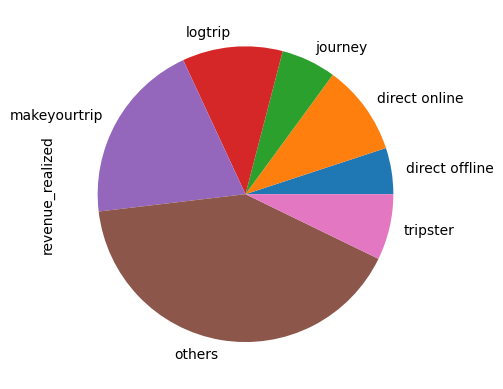

In [161]:
df.groupby("booking_platform")["revenue_realized"].sum().round(2).plot(kind="pie")